In [14]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path

In [15]:
fantasy_file = Path("fantasy_merged_7_17.csv")

In [16]:
fantasy_stats = pd.read_csv(fantasy_file)
p1_clean = fantasy_stats.fillna(0)
p1_clean


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,...,0,0,0.00,0,0,0,-0.4,SudfNa00,80.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022
3385,575,Chad Henne,KAN,QB,37,3,0,0,2,0,...,0,0,0.00,0,1,0,-0.5,HennCh01,81.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,7,11,35,...,0,0,0.00,0,0,0,-1.0,BeatC.00,82.0,2022


In [51]:
p1 = p1_clean.groupby([ "Year", "FantPos"]).sum()["PPR"]

/var/folders/j8/8748_dx152l8zz130b5lvd740000gn/T/ipykernel_1892/1676248174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p1 = p1_clean.groupby([ "Year", "FantPos"]).sum()["PPR"]


In [52]:
p1


Year  FantPos
2017  QB          8005.9
      RB         12031.7
      TE          5831.9
      WR         16144.9
2018  QB          8894.6
      RB         12434.6
      TE          6069.2
      WR         17924.0
2019  QB          8665.0
      RB         12240.2
      TE          6211.8
      WR         17471.2
2020  QB          9481.3
      RB         12146.7
      TE          6435.0
      WR         18908.9
2021  QB          9209.8
      RB         12694.1
      TE          6614.4
      WR         18760.7
2022  QB          8696.5
      RB         12268.5
      TE          6474.3
      WR         17782.4
Name: PPR, dtype: float64

In [53]:
p2 = p1.reset_index()

In [54]:
p2

,Year,FantPos,PPR
0,2017,QB,8005.9
1,2017,RB,12031.7
2,2017,TE,5831.9
3,2017,WR,16144.9
4,2018,QB,8894.6
5,2018,RB,12434.6
6,2018,TE,6069.2
7,2018,WR,17924.0
8,2019,QB,8665.0
9,2019,RB,12240.2


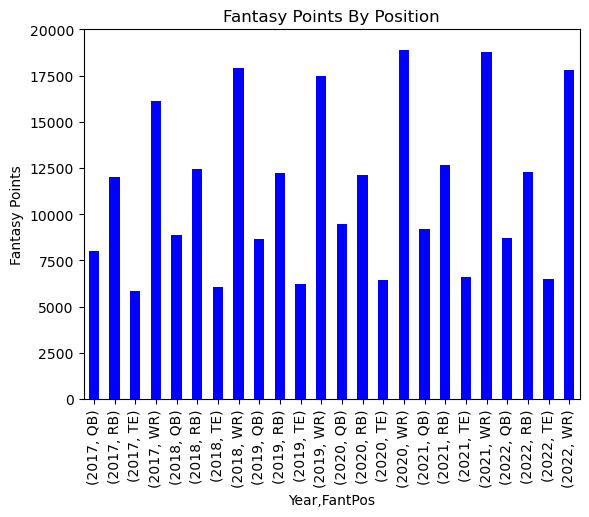

In [58]:
plot1 = p1.plot(kind = "bar", x= "FantPos", y="PPR", color="blue", ylim = (0, 20000), 
                         ylabel = "Fantasy Points", title = "Fantasy Points By Position")